In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.2 MB/s 
     |████████████████████████████████| 58 kB 3.5 MB/s 
     |████████████████████████████████| 690 kB 39.8 MB/s 
     |████████████████████████████████| 4.7 MB 40.6 MB/s 
     |████████████████████████████████| 812 kB 44.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a522c06bd2b116ba60e78ec5549bc641bdfaa258fbe9aa72aa1064e7dcce85e2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=89f4da69a7df4be82c33a20e38f18f1d2ca941c90e78d65ca5b8afab865447f6
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [3]:
!pip3 install --force-reinstall MarkupSafe==2.0.1

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import pandas_profiling as prof
from datetime import datetime as dt
import matplotlib.pyplot as plt
import json
from dateutil.relativedelta import relativedelta

%matplotlib inline
pd.set_option('max_columns', 500)


PATH = './drive/MyDrive/Colab Notebooks/Lina/'

In [5]:
def ti():
    print(dt.now().replace(microsecond=0))
       
def get_zaic(df,*args):
    ti()
    if not(isinstance(df,pd.DataFrame) or isinstance(df,pd.Series)):
        print('Не могу вернуть размер для объекта с типом',type(df))
    elif isinstance(df,pd.Series) or isinstance(df,pd.DataFrame) and df.shape[1] == 1:
        print(round(df.memory_usage(deep=True)/1024**2,2),'Mb')
    else:
        print(round(df.memory_usage(deep=True).sum()/1024**2,2),'Mb')
    print(df.shape)

## Загрузим данные 

Описание полей в файле price_train.tsv:

* **city_quadkey** - полигон, его координаты можно его узнать из скрипта quadkey.py
* **month** - месяц, за который указаны данные в датасете
* **apartment_ratio** - доля квартир в этом районе в этом месяце со статусом "апартаменты" 
* **offers_in_sites_ratio** - доля офферов в ЖК в этом районе в этом месяце
* **unique_active_buildings_count** - количество домов, в которых есть квартиры в продаже в этом районе в этом месяце
* **AVG_PRICE_SQM** - средняя цена за квадратный метр	в этом районе в этом месяце
* **unique_active_building_series_count** - количество уникальных серий домов, в которых есть квартиры в продаже в этом районе в этом месяце	
* **rooms_offered_*_ratio** - доля квартир указанной в * комнатности от всех квартир в продаже в этом районе в этом месяце 	
* **median_price_sqm** - медианы цены за кв.м. в этом районе в этом месяце	
* **total_area_avg** - средний метраж продаваемой квартиры в этом районе в этом месяце	
* **studio_ratio** - доля объявлений о продаже студии среди всех объявлений в этом районе в этом месяце	
* **offer_count** - число объявлений о продаже квартир в этом районе в этом месяце	

In [6]:
df_price = pd.read_table(PATH + 'price_train.tsv')
df_price.month = df_price.month.apply(pd.to_datetime)
# df_price['next_month'] = df_price['month'].apply(lambda x: x + 
#                                                  relativedelta(months=1))
df_price.drop(columns=['offers_in_sites_ratio'], inplace=True)  # constss
print(df_price.month.min(), df_price.month.max())
get_zaic(df_price)
df_price.head(3)

2017-01-01 00:00:00 2019-08-01 00:00:00
2022-05-15 08:51:16
17.73 Mb
(166027, 14)


,apartment_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio
0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0
1,0.0,1,22727.273438,2018-03-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0
2,0.0,1,43478.261719,2018-06-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0


In [7]:
# get_zaic(df_price)
# df_price = pd.merge(
#     df_price.drop(columns=['next_month']), 
#     df_price[['avg_price_sqm', 'city_quadkey', 'next_month']].rename(columns={'avg_price_sqm': 'avg_price_sqm_next'}), 
#     left_on=['city_quadkey', 'month'], 
#     right_on=['city_quadkey', 'next_month'],
#     how='left')
# print()
# df_price.dropna(inplace=True)
# get_zaic(df_price)
# df_price.drop(columns=['next_month'], inplace=True)
# df_price.head(3)

Описание полей в датасете про базу домов price_housebase.tsv:

* **city_quadkey** - полигон, его координаты можно его узнать из скрипта quadkey.py
* **building_id** - id дома
* **unified_address** - адрес дома
* **building_series_id** - id серии дома
* **beauty_cnt** - количество салонов красоты в этом районе city_quadkey	
* **shopping_cnt** - количество магазинов в этом районе city_quadkey	 
* **cafe_restaurant_eating_out_cnt** - количество точек общественного питания в этом районе city_quadkey	
* **entertainment_cnt** - количество организаций в сфере развлечений в этом районе city_quadkey
* **sport_cnt** - количество спортивных организаций в этом районе city_quadkey
* **chain_cnt** - количество сетевых организаций в этом районе city_quadkey
* **groceries_and_everyday_items_cnt** - количество продуктовых магазинов в этом районе city_quadkey	
* **art_cnt** - количество организаций в сфере искусства (музеи, галереи и т.п.) в этом районе city_quadkey
* **healthcare_cnt** - количество организаций в сфере здравоохранения в этом районе city_quadkey	
* **flats_count** - количество квартир в доме	
* **laundry_and_repair_services_cnt** - количество прачечных и ремонтных мастерских в этом районе city_quadkey	
* **latitude, longitude** - координаты дома
* **expect_demolition** - дом входит в программу реновации и ожидает сноса
* **ceiling_height** - высота потолков в доме	
* **has_elevator** - наличие лифта в доме	
* **build_year** - год постройки дома

In [8]:
df_house = pd.read_table(PATH + 'price_housebase.tsv')
get_zaic(df_house)
df_house.expect_demolition = df_house.expect_demolition.apply(int)
df_house.has_elevator = df_house.has_elevator.apply(int)
df_house.head(3)

2022-05-15 08:51:18
45.33 Mb
(112203, 23)


,beauty_cnt,building_id,building_series_id,shopping_cnt,flats_count,latitude,building_type,cafe_restaurant_eating_out_cnt,unified_address,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,site_id,healthcare_cnt,expect_demolition,longitude,ceiling_height,has_elevator,laundry_and_repair_services_cnt,build_year,city_quadkey
0,36.0,3031030817531317628,0,45.0,0,55.705219,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 3",18.0,13.0,127.0,32.0,7.0,0,16.0,0,37.656994,0.0,1,38.0,1937,120310101302011
1,36.0,3031030817531317630,0,45.0,0,55.704845,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 5",18.0,13.0,127.0,32.0,7.0,0,16.0,0,37.657295,0.0,0,38.0,1962,120310101302011
2,36.0,1764947998512909470,0,45.0,0,55.704697,UNKNOWN,24.0,"Россия, Москва, 1-й Автозаводский проезд, 7/1",18.0,13.0,127.0,32.0,7.0,0,16.0,0,37.658203,0.0,0,38.0,0,120310101302011


In [9]:
display(df_house.building_type.value_counts(normalize=True))
df_house.building_type = df_house.building_type.apply(lambda x: 'ANOTHER' if x in 
                                                      ['MONOLIT_BRICK', 
                                                       'WOOD', 
                                                       'METAL', 
                                                       'FERROCONCRETE'] else x)
df_house = pd.get_dummies(df_house, columns=['building_type'])
df_house.head(3)

BRICK            0.358359
PANEL            0.314751
UNKNOWN          0.200119
MONOLIT          0.081923
BLOCK            0.034206
MONOLIT_BRICK    0.008021
WOOD             0.002594
METAL            0.000018
FERROCONCRETE    0.000009
Name: building_type, dtype: float64

,beauty_cnt,building_id,building_series_id,shopping_cnt,flats_count,latitude,cafe_restaurant_eating_out_cnt,unified_address,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,site_id,healthcare_cnt,expect_demolition,longitude,ceiling_height,has_elevator,laundry_and_repair_services_cnt,build_year,city_quadkey,building_type_ANOTHER,building_type_BLOCK,building_type_BRICK,building_type_MONOLIT,building_type_PANEL,building_type_UNKNOWN
0,36.0,3031030817531317628,0,45.0,0,55.705219,24.0,"Россия, Москва, 1-й Автозаводский проезд, 3",18.0,13.0,127.0,32.0,7.0,0,16.0,0,37.656994,0.0,1,38.0,1937,120310101302011,0,0,1,0,0,0
1,36.0,3031030817531317630,0,45.0,0,55.704845,24.0,"Россия, Москва, 1-й Автозаводский проезд, 5",18.0,13.0,127.0,32.0,7.0,0,16.0,0,37.657295,0.0,0,38.0,1962,120310101302011,0,0,1,0,0,0
2,36.0,1764947998512909470,0,45.0,0,55.704697,24.0,"Россия, Москва, 1-й Автозаводский проезд, 7/1",18.0,13.0,127.0,32.0,7.0,0,16.0,0,37.658203,0.0,0,38.0,0,120310101302011,0,0,0,0,0,1


In [10]:
useful_cols = [
    'beauty_cnt',
    'shopping_cnt',
    'flats_count',
    'cafe_restaurant_eating_out_cnt',
    'entertainment_cnt',
    'sport_cnt',
    'chain_cnt',
    'groceries_and_everyday_items_cnt',
    'art_cnt',
    'healthcare_cnt',
    'expect_demolition',
    'ceiling_height',
    'laundry_and_repair_services_cnt',
    'building_type_ANOTHER',
    'building_type_BLOCK',
    'building_type_BRICK',
    'building_type_MONOLIT',
    'building_type_PANEL',
    'building_type_UNKNOWN'
]
grouped_housebase = df_house[useful_cols + 
                             ['city_quadkey']].groupby("city_quadkey")

## Добавим информацию о домах

In [11]:
get_zaic(df_price)

df_price = df_price.merge(grouped_housebase.mean(), how="left", 
                          left_on="city_quadkey", 
                          suffixes=[None,"_bmean"], right_index=True)
df_price = df_price.merge(grouped_housebase.max(),  
                          how="left", left_on="city_quadkey", 
                          suffixes=[None,"_bmax"], right_index=True)
df_price = df_price.merge(grouped_housebase.min(),  
                          how="left", left_on="city_quadkey", 
                          suffixes=[None,"_bmin"], right_index=True)
print()
get_zaic(df_price)
df_price.head(3)

2022-05-15 08:51:18
17.73 Mb
(166027, 14)

2022-05-15 08:51:18
76.63 Mb
(166027, 71)


,apartment_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio,beauty_cnt,shopping_cnt,flats_count,cafe_restaurant_eating_out_cnt,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,healthcare_cnt,expect_demolition,ceiling_height,laundry_and_repair_services_cnt,building_type_ANOTHER,building_type_BLOCK,building_type_BRICK,building_type_MONOLIT,building_type_PANEL,building_type_UNKNOWN,beauty_cnt_bmax,shopping_cnt_bmax,flats_count_bmax,cafe_restaurant_eating_out_cnt_bmax,entertainment_cnt_bmax,sport_cnt_bmax,chain_cnt_bmax,groceries_and_everyday_items_cnt_bmax,art_cnt_bmax,healthcare_cnt_bmax,expect_demolition_bmax,ceiling_height_bmax,laundry_and_repair_services_cnt_bmax,building_type_ANOTHER_bmax,building_type_BLOCK_bmax,building_type_BRICK_bmax,building_type_MONOLIT_bmax,building_type_PANEL_bmax,building_type_UNKNOWN_bmax,beauty_cnt_bmin,shopping_cnt_bmin,flats_count_bmin,cafe_restaurant_eating_out_cnt_bmin,entertainment_cnt_bmin,sport_cnt_bmin,chain_cnt_bmin,groceries_and_everyday_items_cnt_bmin,art_cnt_bmin,healthcare_cnt_bmin,expect_demolition_bmin,ceiling_height_bmin,laundry_and_repair_services_cnt_bmin,building_type_ANOTHER_bmin,building_type_BLOCK_bmin,building_type_BRICK_bmin,building_type_MONOLIT_bmin,building_type_PANEL_bmin,building_type_UNKNOWN_bmin
0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0
1,0.0,1,22727.273438,2018-03-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0
2,0.0,1,43478.261719,2018-06-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0


## Фичи из даты + праздники

In [12]:
df_price['month_num'] = df_price['month'].apply(lambda x: x.month)
df_price['quarter'] = df_price['month'].apply(lambda x: x.quarter)
df_price.head(3)

,apartment_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio,beauty_cnt,shopping_cnt,flats_count,cafe_restaurant_eating_out_cnt,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,healthcare_cnt,expect_demolition,ceiling_height,laundry_and_repair_services_cnt,building_type_ANOTHER,building_type_BLOCK,building_type_BRICK,building_type_MONOLIT,building_type_PANEL,building_type_UNKNOWN,beauty_cnt_bmax,shopping_cnt_bmax,flats_count_bmax,cafe_restaurant_eating_out_cnt_bmax,entertainment_cnt_bmax,sport_cnt_bmax,chain_cnt_bmax,groceries_and_everyday_items_cnt_bmax,art_cnt_bmax,healthcare_cnt_bmax,expect_demolition_bmax,ceiling_height_bmax,laundry_and_repair_services_cnt_bmax,building_type_ANOTHER_bmax,building_type_BLOCK_bmax,building_type_BRICK_bmax,building_type_MONOLIT_bmax,building_type_PANEL_bmax,building_type_UNKNOWN_bmax,beauty_cnt_bmin,shopping_cnt_bmin,flats_count_bmin,cafe_restaurant_eating_out_cnt_bmin,entertainment_cnt_bmin,sport_cnt_bmin,chain_cnt_bmin,groceries_and_everyday_items_cnt_bmin,art_cnt_bmin,healthcare_cnt_bmin,expect_demolition_bmin,ceiling_height_bmin,laundry_and_repair_services_cnt_bmin,building_type_ANOTHER_bmin,building_type_BLOCK_bmin,building_type_BRICK_bmin,building_type_MONOLIT_bmin,building_type_PANEL_bmin,building_type_UNKNOWN_bmin,month_num,quarter
0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,2,1
1,0.0,1,22727.273438,2018-03-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,3,1
2,0.0,1,43478.261719,2018-06-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,6,2


In [13]:
def get_days_cnt(x, dates_list):
    cnt = 0
    for elem in dates_list:
        if x.month == elem.month and x.year == elem.year:
            cnt += 1
    return cnt


preholidays = list()
holidays = list()

for year in list(range(2017, 2019)):
    with open(PATH + './consultant' +str(year) + '.json') as f:
        calend = json.load(f)
        for elem in calend['preholidays']:
            preholidays.append(pd.to_datetime(elem))
        for elem in calend['holidays']:
            holidays.append(pd.to_datetime(elem))
        if 'nowork' in calend:
            for elem in calend['nowork']:
                holidays.append(pd.to_datetime(elem))

df_price['prehol_cnt'] = df_price['month'].apply(lambda x: get_days_cnt(x, preholidays))
df_price['hol_cnt'] = df_price['month'].apply(lambda x: get_days_cnt(x, holidays))
df_price.head(3)

,apartment_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio,beauty_cnt,shopping_cnt,flats_count,cafe_restaurant_eating_out_cnt,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,healthcare_cnt,expect_demolition,ceiling_height,laundry_and_repair_services_cnt,building_type_ANOTHER,building_type_BLOCK,building_type_BRICK,building_type_MONOLIT,building_type_PANEL,building_type_UNKNOWN,beauty_cnt_bmax,shopping_cnt_bmax,flats_count_bmax,cafe_restaurant_eating_out_cnt_bmax,entertainment_cnt_bmax,sport_cnt_bmax,chain_cnt_bmax,groceries_and_everyday_items_cnt_bmax,art_cnt_bmax,healthcare_cnt_bmax,expect_demolition_bmax,ceiling_height_bmax,laundry_and_repair_services_cnt_bmax,building_type_ANOTHER_bmax,building_type_BLOCK_bmax,building_type_BRICK_bmax,building_type_MONOLIT_bmax,building_type_PANEL_bmax,building_type_UNKNOWN_bmax,beauty_cnt_bmin,shopping_cnt_bmin,flats_count_bmin,cafe_restaurant_eating_out_cnt_bmin,entertainment_cnt_bmin,sport_cnt_bmin,chain_cnt_bmin,groceries_and_everyday_items_cnt_bmin,art_cnt_bmin,healthcare_cnt_bmin,expect_demolition_bmin,ceiling_height_bmin,laundry_and_repair_services_cnt_bmin,building_type_ANOTHER_bmin,building_type_BLOCK_bmin,building_type_BRICK_bmin,building_type_MONOLIT_bmin,building_type_PANEL_bmin,building_type_UNKNOWN_bmin,month_num,quarter,prehol_cnt,hol_cnt
0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,2,1,1,9
1,0.0,1,22727.273438,2018-03-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,3,1,1,11
2,0.0,1,43478.261719,2018-06-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,6,2,1,10


## Лаги по таргету и сильной фиче
В силу специфики временных рядов можно попробовать добавить лаги. В финальном варианте эта часть закомментирована, потому что гипотеза не оправдалась.

In [14]:
# df_price['prev_month'] = df_price['month'].apply(lambda x: x - 
#                                                  relativedelta(months=1))

In [15]:
# get_zaic(df_price)
# df_price = pd.merge(
#     df_price.drop(columns=['prev_month']), 
#     df_price[['avg_price_sqm', 
#               'city_quadkey', 
#               'prev_month', 
#               'median_price_sqm']].rename(columns={'avg_price_sqm': 
#                                                    'avg_price_sqm_prev', 
#                                                    'median_price_sqm': 
#                                                    'median_price_sqm_prev'}), 
#     left_on=['city_quadkey', 'month'], 
#     right_on=['city_quadkey', 'prev_month'],
#     how='left')
# print()
# get_zaic(df_price)
# df_price.drop(columns=['prev_month'], inplace=True)
# df_price.head(3)

## Посмотрим на данные
Можно графиками в питоне с использованием базовых библиотек или более продвинутых. А можно в BI системах (https://datalens.yandex.ru/ud7ndrq1r6zsm-linasf)

Также отдельно прилагается HTML файл с отчетом pandas-profiling

In [16]:
get_zaic(df_price)
df_price.to_csv(PATH + 'df_price.csv')
df_price.head(3)

2022-05-15 08:51:27
81.7 Mb
(166027, 75)


,apartment_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio,beauty_cnt,shopping_cnt,flats_count,cafe_restaurant_eating_out_cnt,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,healthcare_cnt,expect_demolition,ceiling_height,laundry_and_repair_services_cnt,building_type_ANOTHER,building_type_BLOCK,building_type_BRICK,building_type_MONOLIT,building_type_PANEL,building_type_UNKNOWN,beauty_cnt_bmax,shopping_cnt_bmax,flats_count_bmax,cafe_restaurant_eating_out_cnt_bmax,entertainment_cnt_bmax,sport_cnt_bmax,chain_cnt_bmax,groceries_and_everyday_items_cnt_bmax,art_cnt_bmax,healthcare_cnt_bmax,expect_demolition_bmax,ceiling_height_bmax,laundry_and_repair_services_cnt_bmax,building_type_ANOTHER_bmax,building_type_BLOCK_bmax,building_type_BRICK_bmax,building_type_MONOLIT_bmax,building_type_PANEL_bmax,building_type_UNKNOWN_bmax,beauty_cnt_bmin,shopping_cnt_bmin,flats_count_bmin,cafe_restaurant_eating_out_cnt_bmin,entertainment_cnt_bmin,sport_cnt_bmin,chain_cnt_bmin,groceries_and_everyday_items_cnt_bmin,art_cnt_bmin,healthcare_cnt_bmin,expect_demolition_bmin,ceiling_height_bmin,laundry_and_repair_services_cnt_bmin,building_type_ANOTHER_bmin,building_type_BLOCK_bmin,building_type_BRICK_bmin,building_type_MONOLIT_bmin,building_type_PANEL_bmin,building_type_UNKNOWN_bmin,month_num,quarter,prehol_cnt,hol_cnt
0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,2,1,1,9
1,0.0,1,22727.273438,2018-03-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0.0,1.0,0,0,0,0,1,0,3,1,1,11
2,0.0,1,43478.261719,2018-06-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0,0.0,0.0,0,0,0,0,1,0,6,2,1,10


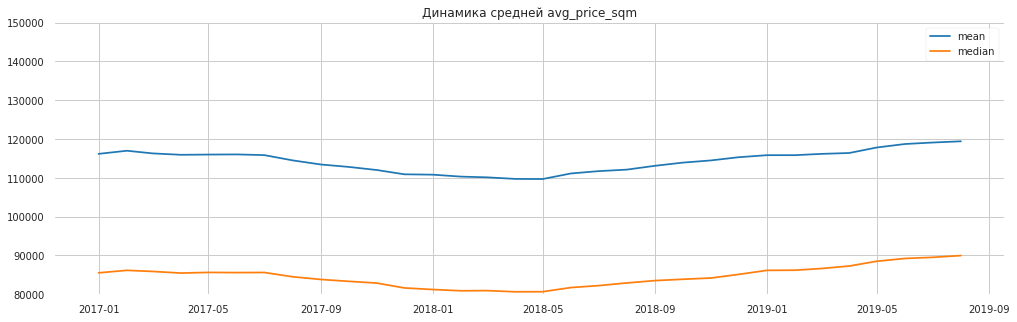

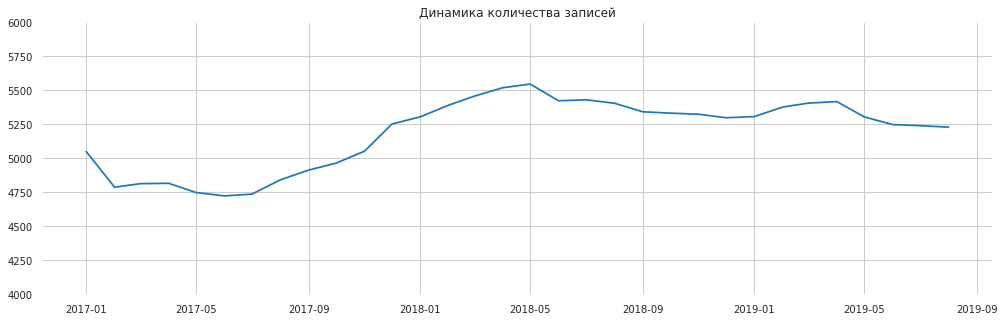

In [17]:
df_gr = df_price.groupby('month').agg({'avg_price_sqm': 
                                       ['mean', 'count', 'median']}).reset_index()
df_gr.columns=df_gr.columns.droplevel()
df_gr.to_csv(PATH + 'df_gr_avg_price_sqm.csv')

fig = plt.figure(figsize=(17, 5))
plt.plot(df_gr[''], df_gr['mean'])
plt.plot(df_gr[''], df_gr['median'])
plt.title('Динамика средней avg_price_sqm')
plt.ylim([80000, 150000])
plt.grid(True)
plt.legend(['mean', 'median'])
plt.show()
print()
fig = plt.figure(figsize=(17, 5))
plt.plot(df_gr[''], df_gr['count'])
plt.title('Динамика количества записей')
plt.ylim([4000, 6000])
plt.grid(True)
plt.show()

In [18]:
ANOM_BORDER = df_price['avg_price_sqm'].quantile(0.95)

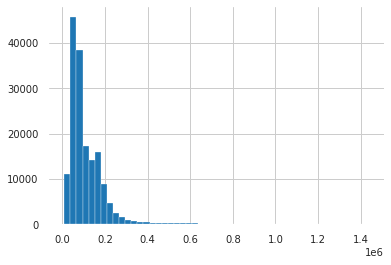

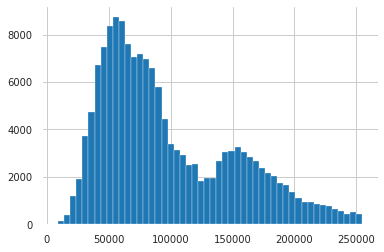

In [19]:
df_price['avg_price_sqm'].hist(bins=50)
plt.show()
print()
df_price[df_price.avg_price_sqm <= ANOM_BORDER]['avg_price_sqm'].hist(bins=50)
plt.show()

In [20]:
# В колабе перестало работать, можно запустить на локальном ПК
# prof.ProfileReport(df_price)

## Проверим, что нет явного мусора

In [21]:
isna_ser = df_price.isna().sum() / len(df_price)
assert len(isna_ser[isna_ser>0.9]) == 0

In [22]:
%%time
cols_low_variance = df_price.fillna(-1234).std(axis=0) == 0
cols_low_variance = [elem for elem in cols_low_variance.index if cols_low_variance[elem]]
df_price = df_price.drop(cols_low_variance, axis=1)
print(cols_low_variance)

[]
CPU times: user 930 ms, sys: 52.3 ms, total: 982 ms
Wall time: 990 ms
